In [15]:
import numpy as np
from scipy.fftpack import fft, ifft

# fs = 1000
# fl = 15.0/(fs)
# fh = 45.0/(fs)
fs = 100
element_freq = 5
fl = ((element_freq - 3)*2)/fs
fh = ((element_freq+3)*2)/fs
taps = 128
NX = 4000
NY = 4096

filter = np.zeros(NX, dtype = np.float32)

#generate bandpass filter
def sinc(x):
    if(x == 0):
        return 1
    return np.sin(np.pi*x)/(np.pi*x)

bp = np.zeros(NX)
for i in range(taps):
    n = i - int(taps/2)
    w = np.sin((np.pi * i)/(taps - 1)) * np.sin((np.pi*i)/(taps - 1))
    bp[i] = 2.0*fl*sinc(2.0*fl*n) - 2.0*fh*sinc(2.0*fh*n)
    bp[i] = w*bp[i]

#generate hilbert filter
h = np.zeros(NX)
for i in range(NX):
    if i == 0 or i==NX/2:
        h[i] = 1
    elif i<NX/2:
        h[i] = 2
    else:
        h[i] = 0

In [20]:
t = np.arange(0, NX/fs, 1/fs)
x = 10*np.sin(2*np.pi*5*t) + 20*np.sin(2*np.pi*30*t) + 15*np.sin(2*np.pi*60*t)
X = fft(x) 
BP = fft(bp)
# H = fft(h)
Y = np.empty(NX, dtype = np.complex)
for i in range(NX):
    Y[i] = X[i] * BP[i] * h[i]
y = ifft(Y, NX)

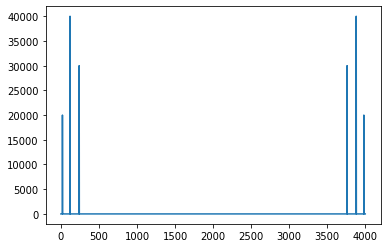

In [14]:
from matplotlib import pyplot as plt

plt.plot(np.abs(X))

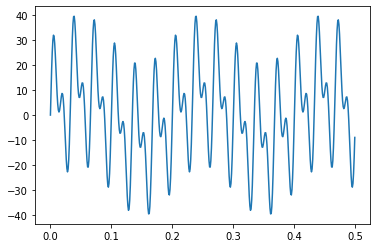

In [15]:
plt.plot(t[:500], x[:500])

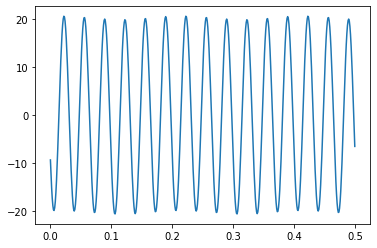

In [16]:
plt.plot(t[:500], y.real[:500])

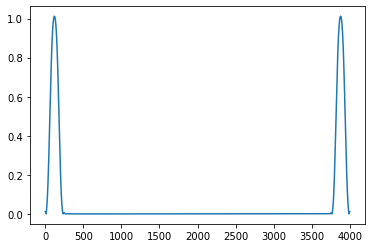

In [17]:
plt.plot(np.abs(BP))

# 实际数据测试

In [1]:
import numpy as np
from scipy import signal, fftpack

signal_path = "../data/YJBL_5L64_0p5_100MHz_4000.csv"
TOF_path = "../data/TOF_Data_40_40_0p04Plane.csv"
with open(signal_path, encoding='utf-8') as f:
    offLineFmcMat = np.loadtxt(f, delimiter=',')
with open(TOF_path, encoding='utf-8') as f:
    iTof = np.loadtxt(f, delimiter=',')
iTof = iTof.T

In [2]:
N = 2*4+1
WaveNum = 2048
element_freq = 5
sample_freq = 100
iWaveLength = 4000
low_cut = ((element_freq - 3)*2)/sample_freq
high_cut = ((element_freq+3)*2)/sample_freq
b, a = signal.butter(N, [low_cut, high_cut], 'bandpass')
FmcMatHilbert = np.empty((WaveNum, iWaveLength), dtype = np.complex)
for i in range(WaveNum):
    filterWave = signal.filtfilt(b, a, offLineFmcMat[i][2:])
    FmcMatHilbert[i] = fftpack.hilbert(filterWave)

In [ ]:
N = 2*4+1
WaveNum = 2048
element_freq = 5
sample_freq = 100
iWaveLength = 4000
low_cut = ((element_freq - 3)*2)/sample_freq
high_cut = ((element_freq+3)*2)/sample_freq
b, a = signal.butter(N, [low_cut, high_cut], 'bandpass')
FmcMatHilbert = np.empty((WaveNum, iWaveLength), dtype = np.complex)
for i in range(WaveNum):
    filterWave = signal.filtfilt(b, a, offLineFmcMat[i][2:])
    FmcMatHilbert[i] = fftpack.hilbert(filterWave)

NX, NZ = 1001, 1001
SignalNum = 2048
PixelNum = NX*NZ
MaxInTfmArray = 0

TfmArray = np.empty(NZ*NX, dtype = np.float32)
for i in range(PixelNum):
    real = 0
    imag = 0
    for s in range(SignalNum):
        tIndex, rIndex = int(offLineFmcMat[s][0]-1), int(offLineFmcMat[s][1]-1)
        trTofIndex = int(iTof[tIndex][i] + iTof[rIndex][i])
        real += FmcMatHilbert[s][trTofIndex-1].real
        imag += FmcMatHilbert[s][trTofIndex-1].imag
    TfmArray[i] = np.sqrt(np.power(real, 2)+np.power(imag, 2))
    MaxInTfmArray = max(MaxInTfmArray, TfmArray[i])

MindB = -30
TfmImage = np.empty((NZ, NX), dtype = np.float32)
for Z in range(NZ):
    for X in range(NX):
        value = TfmArray[Z*NX+X]
        dBvalue = max(20*np.log10(value/MaxInTfmArray), MindB)
        TfmImage[Z][X] = dBvalue

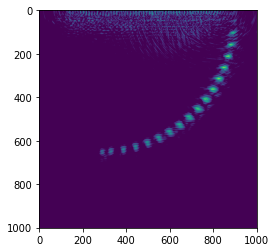

In [1]:
from matplotlib import pyplot as plt
import numpy as np

TfmImage = np.load('../data/save_TfmImage.npy')
plt.imshow(TfmImage)

# 绘制cuda生成的结果

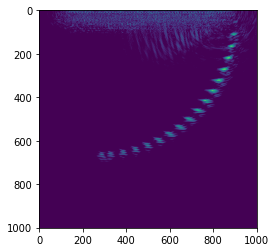

In [11]:
import numpy as np
from matplotlib import pyplot as plt

p = "../data/output_data.txt"
with open(p,encoding = 'utf-8') as f:
    data = np.loadtxt(f)
plt.imshow(data)